# Machine Learning - Sklearn

## Importing our clean dataset

In [1]:
%run cleanData.ipynb

In [2]:
df

,age,gender,scentLover,ecoInterest,washDishes,MrPropre,Antikal,Ariel,Dash,pods,...,likesPets,hasPet,daysSinceActivity,nbChildren,magasin,moyenneSurface,superMarket,hyperMarket,drive,hardDiscount
0,0.077922,1,0.000000,0.387479,1,-1,-1,-1,-1,-1,...,0.9,1,0.234694,0.2,-1,-1,-1,-1,-1,-1
1,0.636364,1,0.378258,0.666667,1,1,1,1,-1,1,...,0.3,-1,0.014914,0.6,-1,-1,-1,-1,-1,-1
2,0.350649,1,0.000000,0.666667,1,-1,-1,1,1,-1,...,0.9,1,0.094976,0.2,-1,-1,-1,-1,-1,-1
3,0.220779,1,0.333333,0.333333,-1,-1,-1,1,1,1,...,0.9,1,0.259812,0.4,-1,-1,-1,-1,-1,-1
4,0.259740,1,0.378258,0.000000,-1,1,1,1,1,-1,...,0.9,1,0.116954,0.0,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.454545,1,0.378258,0.387479,1,-1,-1,-1,-1,1,...,0.9,1,0.000785,1.0,-1,-1,-1,-1,-1,-1
11996,0.324675,1,0.333333,0.333333,-1,-1,-1,-1,-1,-1,...,0.9,1,0.124019,0.0,-1,-1,-1,-1,-1,-1
11997,0.311688,1,0.378258,0.666667,-1,-1,-1,-1,-1,-1,...,0.9,1,0.018838,0.6,-1,-1,-1,-1,-1,-1
11998,0.272727,-1,0.378258,0.387479,1,-1,-1,-1,-1,-1,...,0.9,1,0.197017,0.2,-1,-1,-1,-1,-1,-1


In [3]:
df2 = pd.read_csv(r"DS_CentraleSupelec_ST42021/DS_CentraleSupelec_train.csv")

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df=clean_dataset(df)

## Model fitting

In [5]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

For the model fitting, we will try out the following :

* Logistic regression in the primal space and with different kernels
* SVM in the primal and with different Kernels
* Ensemble models

In [23]:
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

In [15]:
y = df.washDishes.values
x = df.drop(['washDishes'], axis = 1)
x['userId']=df2['userId']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
#transpose matrices
xtrain=x_train.copy()
xtest=x_test.copy()
x_train=x_train.drop(columns='userId')
x_test=x_test.drop(columns='userId')
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [25]:
accuracies = {}
param_grid = {'C': [0.1,0.2,0.5,1,10], 'max_iter': [250, 500], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
lr = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=5, refit=True, verbose=0) 
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100
accuracies['Logistic Regression'] = acc
print(best_model(lr))
print("Test Accuracy {:.2f}%".format(acc))

0.617396601924583
{'C': 0.1, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
LogisticRegression(C=0.1, max_iter=250, tol=1e-05)
None
Test Accuracy 63.02%


In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 59.19%


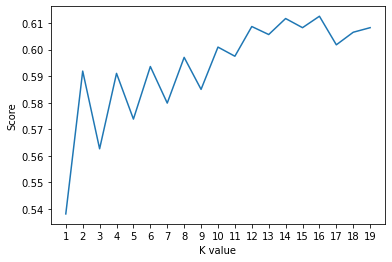

Maximum KNN Score is 61.26%


In [10]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [19]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
y_pred = svm.fit(x_train.T, y_train.T).predict(x_test.T)
sol=pd.DataFrame({'userId':xtest['userId'],'washDishes':y_pred})
sol["washDishes"] = sol["washDishes"].apply(lambda e: 'Auto' if e == 1 else 'Hand')


,userId,washDishes
7569,use_xlGkZRkIttuQUkp4NO11Tzdhr5U,Hand
7868,use_pwnSBCBRgvbAhiNU2uE1Tzf20xu,Hand
7788,use_wW64eFUH6gYgcUbItwW1TzdmQko,Hand
8244,use_Fm9HhaaawNhUZe1J1f81TzdgrV4,Hand
1337,use_9FaU4ibwLBwjoHw8GNb1Tzf17hu,Hand
...,...,...
3298,use_ptYvgwwBcVtQEPoWVS31TzeQDWz,Hand
3046,use_k9EbWXotMl8eUJPIRdA1TzehySi,Hand
2439,use_eOCrW585BNhB8VIqjbW1TzeCPp4,Hand
8052,use_wHx67eImIAbjWKhQ80S1TzduPcb,Auto


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 60.91%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 54.15%


In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 61.73%


In [ ]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
rbf_feature = RBFSampler(gamma=1, random_state=1)
x_features = rbf_feature.fit_transform(x_train.T)
clf = SGDClassifier(max_iter=250)
clf.fit(x_features, y)

acc = clf.score(x_train.T,y_test.T)*100
accuracies['SDG Classifier'] = acc
print("SDG Classifier Algorithm Accuracy Score : {:.2f}%".format(acc))

ValueError: Found input variables with inconsistent numbers of samples: [9289, 11612]

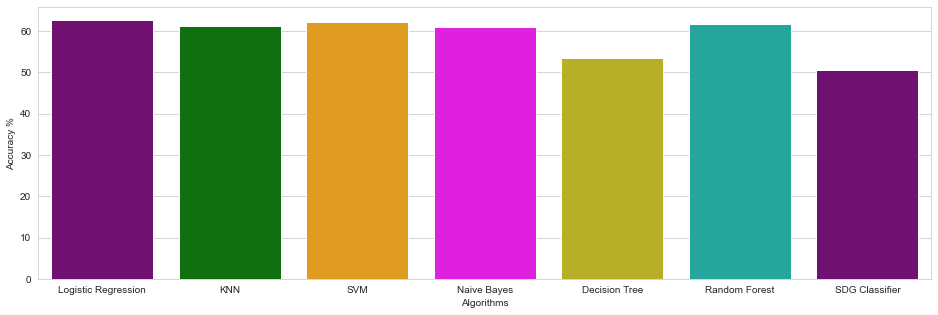

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [ ]:
# Function to give best model score and parameters
'''def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)'''

'def best_model(model):\n    print(model.best_score_)    \n    print(model.best_params_)\n    print(model.best_estimator_)\ndef get_auc_scores(y_actual, method,method2):\n    auc_score = roc_auc_score(y_actual, method); \n    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); \n    return (auc_score, fpr_df, tpr_df)'

In [ ]:
'''# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=5, refit=True, verbose=0) 
log_primal_Grid.fit(df.loc[:, df.columns != 'washDishes'],df.washDishes)
best_model(log_primal_Grid)'''

"# Fit primal logistic regression\nparam_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],\n              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}\nlog_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=5, refit=True, verbose=0) \nlog_primal_Grid.fit(df.loc[:, df.columns != 'washDishes'],df.washDishes)\nbest_model(log_primal_Grid)"

In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
'''param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_pol2 = poly2.fit_transform(df.loc[:, df.columns != 'washDishes'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_pol2,df.washDishes)
best_model(log_pol2_Grid)'''

"param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],\n              'tol':[0.0001,0.000001]}\npoly2 = PolynomialFeatures(degree=2)\ndf_pol2 = poly2.fit_transform(df.loc[:, df.columns != 'washDishes'])\nlog_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)\nlog_pol2_Grid.fit(df_pol2,df.washDishes)\nbest_model(log_pol2_Grid)"

In [ ]:
# Fit Extreme Gradient boosting classifier
'''param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(objective='binary:logistic',eval_metric='error'), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df.loc[:, df.columns != 'washDishes'],df.washDishes)
best_model(xgb_grid)'''

"param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}\nxgb_grid = GridSearchCV(XGBClassifier(objective='binary:logistic',eval_metric='error'), param_grid, cv=5, refit=True, verbose=0)\nxgb_grid.fit(df.loc[:, df.columns != 'washDishes'],df.washDishes)\nbest_model(xgb_grid)"